In [15]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

El _modelado en cascada_ G(N,p) es una forma de generar grafos random dirigidos acíclicos (DAG) 
utilizados por ejemplo para modelar redes tróficas. El mismo consiste en: 
* Etiquetar los nodos de una red G(N,p) de partida
* Asignar direccionalidad a cada enlace, desde el nodo de etiqueta mayor al de menor valor (de esta manera se asegura que la red sea acíclica)

## Inciso (a)
* Buscamos el $\langle k^{in}_{i} \rangle$. El nodo $i$ puede recibir enlaces de sus todos los nodos $j$ con $j > i$. Es decir, $j = n - i$ con $n$ la cantidad de nodos totales. Cada uno de esos enlaces tiene probabilidad $p$ de enlazarse. 

$\Rightarrow \langle k^{in}_{i} \rangle = (n - i) p $

* A su vez, cada nodo $i$ puede enlazarse con los nodos $l$ con $l < i$. Es decir, $l = i - 1$. Cada uno de esos enlaces también ocurren con probabilidad $p$.

$\Rightarrow \langle k^{out}_{i} \rangle = (i - 1) p $

## Inciso (b)
Luego nos interesa el número esperado de enlaces que conectan el nodo $i$ y menores, desde
vértices mayores a $i$. Tomo el nodo $i$, éste puede recibir $n -i$ enlaces (provenientes de todos los nodos con índice mayores a él). El nodo $i - 1$ puede a lo sumo recibir también $ n -i $ enlaces de nodos con índice mayores a $i$. Es decir, cada uno de los $i$ nodos con índice menor o igual a $i$ pueden recibir $n -i$ enlaces con estas condiciones. Cada uno de esos enlaces puede suceder con probabilidad $p$.

Por ende, el número de enlaces esperado es $i (n - i) p = (ni - i^2)p$

Vamos a ver si se cumple la relación teórica. Tomamos redes acíclica dirigida de 1000 nodos con $p$ variando de $0.1$ a $1$. Para las mismas guardamos sus in-degrees, sus out-degrees y la cantidad de enlaces con las caracteristicas del **Inciso (b)**.

In [33]:
k_in = {}
k_out = {}
num_edges = {}
n = 1000

for p in np.arange(0.1,1,0.1):
    G = nx.gnp_random_graph(n ,p, directed=True)
    DAG = nx.DiGraph([(u,v) for (u,v) in G.edges() if v<u])
    k_in[p] = {}
    k_in[p] = dict(DAG.in_degree)
    k_out[p] = {}
    k_out[p] = dict(DAG.out_degree)
    
    #Punto b, calculo enlaces de nodos mayores a i hasta i
    num_edges[p] = {}
    for i in range(0, n):
        for (u,v) in DAG.edges():
            if  v <= i: #nodos menores o iguales
                if u > i: #de nodos mayores a i
                    if num_edges[p].get(i):
                        num_edges[p][i] +=  1
                    else:
                        num_edges[p][i] = 1           
    

Hacemos un gráfico de los in-degrees para cada nodo y lo comparamos con el valor esperado teóricamente. 

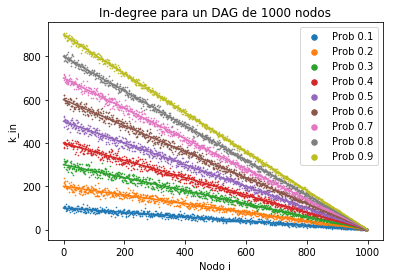

In [17]:
error_dict = {}
for p in k_in.keys():
    x, y = zip(*k_in[p].items())
    plt.scatter(x, y, label = f'Prob {round(p, 2)}', s = 0.4)

    x_teo = range(0,n)
    y_teo = []
    for i in x_teo:
        y_teo.append((n - i) * p)
    plt.plot(x_teo, y_teo)
    
    values, cov = np.polyfit(x, y, 1, cov=True)
    error_dict[f'Prob {round(p,2)}'] = abs(values[0] - (- p)) * 100 / p

plt.plot()
plt.xlabel('Nodo i')
plt.ylabel('k_in')
plt.title(f'In-degree para un DAG de {n} nodos')
lgnd = plt.legend(scatterpoints=1, fontsize=10)
for i in range(0, len(k_in.keys())):
    lgnd.legendHandles[i]._sizes = [30]
plt.show()



In [84]:
import pandas as pd 
df = pd.DataFrame.from_dict(error_dict, orient='index', dtype=None, columns=["Diferencia con el valor teorico (%)"])
df.astype(float).round(2)

,Diferencia con el valor teorico (%)
Prob 0.1,0.52
Prob 0.2,0.07
Prob 0.3,0.24
Prob 0.4,0.29
Prob 0.5,0.27
Prob 0.6,0.02
Prob 0.7,0.15
Prob 0.8,0.05
Prob 0.9,0.10


Hacemos lo mismo para los out-degrees también comprobando la relación teórica. 


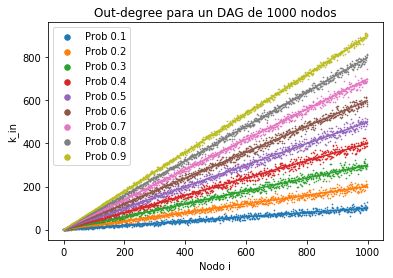

In [19]:
error_out_dict = {}
for p in k_out.keys():
    x, y = zip(*k_out[p].items())
    plt.scatter(x, y, label = f'Prob {round(p, 2)}', s = 0.4)

    x_teo = range(0, n)
    y_teo = []
    for i in x_teo:
        y_teo.append((i - 1) * p)
    plt.plot(x_teo, y_teo)
    
    values, cov = np.polyfit(x, y, 1, cov=True)
    error_out_dict[f'Prob {round(p,2)}'] = abs(values[0] - p) * 100 / p
    

lgnd = plt.legend(scatterpoints=1, fontsize=10)
for i in range(0, len(k_in.keys())):
    lgnd.legendHandles[i]._sizes = [30]
plt.plot()
plt.xlabel('Nodo i')
plt.ylabel('k_in')
plt.title(f'Out-degree para un DAG de {n} nodos')
plt.show()

In [85]:
df = pd.DataFrame.from_dict(error_out_dict, orient='index', dtype=None, columns=["Diferencia con el valor teorico (%)"])
df.astype(float).round(2)

,Diferencia con el valor teorico (%)
Prob 0.1,0.46
Prob 0.2,0.18
Prob 0.3,0.03
Prob 0.4,0.09
Prob 0.5,0.12
Prob 0.6,0.15
Prob 0.7,0.40
Prob 0.8,0.06
Prob 0.9,0.11


Veamos ahora los enlaces pedidos en el **Inciso (b)**. Para los mismos también les buscaremos el máximo y el mínimo. 

Teóricamente el máximo lo podemos hallar al derivar la expresión de enlaces E con respecto a $i$. 

$\frac{dE}{di} = (n - 2i) p$

Igualamos a cero considerando que $p, n \neq 0$. 

$\Rightarrow i = \frac{n}{2}$. 

Es decir, el máximo está el nodo de la "mitad". El modelo de cascada predice que el flujo será mayor en las porciones medias del grafo y menos en sus extremos. En los extremos es trivial que estén los mínimos ya que se da por condiciones de borde: el nodo $0$ no tiene nodos de íncide menores quiénes le puedan dar enlaces y el nodo $n$ no tiene nodos mayores a quién darle enlaces.

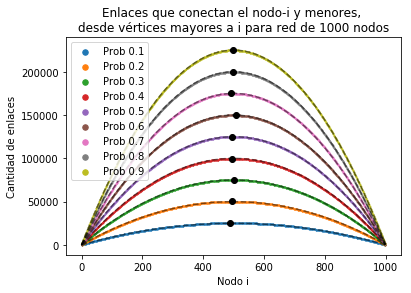

 El máximo se encuentra en promedio en el nodo 496 +- 5


In [82]:
xs_max = []
for p in num_edges.keys():
    x, y = zip(*num_edges[p].items())
    plt.scatter(x, y, label = f'Prob {round(p, 2)}', s = 0.5)
    y_max = max(y)
    x = np.array(x)
    y = np.array(y)
    x_max = x[np.where(y == y_max)]
    xs_max.append(x_max)
    plt.scatter(x_max, y_max, c= 'black')
    
    x_teo = range(0, n)
    y_teo = []
    for i in x_teo:
        y_teo.append((n * i - i * i) * p)
    plt.plot(x_teo, y_teo, linestyle = '--', c = 'black', alpha = 0.5)
    

lgnd = plt.legend(scatterpoints=1, fontsize=10)
for i in range(0, len(k_in.keys())):
    lgnd.legendHandles[i]._sizes = [30]
plt.xlabel('Nodo i')
plt.ylabel('Cantidad de enlaces')
plt.title(f'Enlaces que conectan el nodo-i y menores, \n'
          f'desde vértices mayores a i para red de {n} nodos')
plt.show()

print(f' El máximo se encuentra en promedio en el nodo {int(np.mean(xs_max))} +- {int(np.std(xs_max))}')